In [11]:
IMG_HEIGHT = 256
IMG_WIDTH  = 256

NUM_AUGMENTED_IMAGE = 50
CSV_FILENAME        = 'data/bisindo_features.csv'

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

def split_data(csv_filename):
    df = pd.read_csv(csv_filename)
    train, temp = train_test_split(df, test_size=0.3, stratify=df['label'])
    val, test = train_test_split(temp, test_size=0.5, stratify=temp['label'])
    
    train.to_csv("data/train.csv", index=False)
    val.to_csv("data/val.csv", index=False)
    test.to_csv("data/test.csv", index=False)

split_data(CSV_FILENAME)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Load datasets
train_df = pd.read_csv('data/train.csv')
val_df = pd.read_csv('data/val.csv')
test_df = pd.read_csv('data/test.csv')

train = train_df.fillna(0)
val = val_df.fillna(0)
test = test_df.fillna(0)

train

,label,hand_0_x,hand_1_x,hand_2_x,hand_3_x,hand_4_x,hand_5_x,hand_6_x,hand_7_x,hand_8_x,...,hand_32_z,hand_33_z,hand_34_z,hand_35_z,hand_36_z,hand_37_z,hand_38_z,hand_39_z,hand_40_z,hand_41_z
0,C,0.824879,0.705324,-6.635812e-07,0.681194,0.698256,-0.009862,0.549891,0.661452,-0.055104,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,M,0.771833,0.665022,8.757966e-07,0.637511,0.686965,-0.021959,0.508432,0.633361,-0.035126,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,I,0.691983,0.746544,-4.163056e-07,0.615282,0.714815,-0.061203,0.541533,0.641177,-0.078463,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,X,0.680013,0.774084,-5.181190e-07,0.596994,0.762557,-0.018923,0.521249,0.719855,-0.046527,...,-0.121352,0.302521,0.713953,-0.148138,0.298653,0.746720,-0.136553,0.271448,0.744576,-0.125447
4,K,0.104299,0.597994,-6.729557e-08,0.234435,0.539315,-0.005172,0.389716,0.553040,-0.048758,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10140,P,0.414424,0.729615,1.159458e-07,0.479803,0.661714,0.002298,0.527703,0.586955,-0.011177,...,-0.060243,0.918521,0.569258,-0.091932,0.920359,0.624391,-0.074164,0.921419,0.645304,-0.052197
10141,V,0.133498,0.619051,2.954277e-07,0.252195,0.709969,-0.056484,0.352738,0.730368,-0.104058,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10142,G,0.755309,0.462609,-5.236782e-07,0.683995,0.276709,-0.000277,0.576062,0.161447,-0.004658,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10143,M,0.265581,0.712224,1.280780e-06,0.390289,0.650728,-0.005677,0.485989,0.600165,-0.020240,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
# Prepare data
X_train = train.drop(columns=['label'])
y_train = train['label']
X_val = val.drop(columns=['label'])
y_val = val['label']
X_test = test.drop(columns=['label'])
y_test = test['label']

# Train RandomForest
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

Validation Set Metrics:
Validation Accuracy: 0.9931
Validation F1 Score (Weighted): 0.9931

Validation Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        88
           B       1.00      0.94      0.97        80
           C       1.00      1.00      1.00        90
           D       1.00      1.00      1.00        84
           E       0.99      1.00      0.99        90
           F       1.00      1.00      1.00        90
           G       1.00      0.99      0.99        89
           H       1.00      0.99      0.99        82
           I       1.00      1.00      1.00        90
           J       1.00      1.00      1.00        90
           K       1.00      1.00      1.00        90
           L       1.00      1.00      1.00        88
           M       0.98      0.99      0.98        90
           N       0.99      0.98      0.98        90
           O       1.00      1.00      1.00        90
         

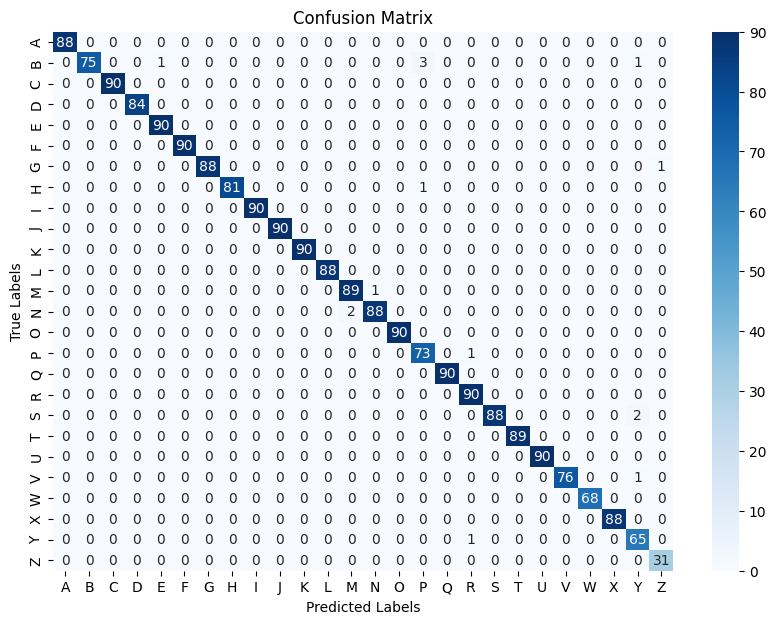

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

y_val_pred = clf.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred, average='weighted')
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_classification_rep = classification_report(y_val, y_val_pred)

# Print the validation metrics
print("Validation Set Metrics:")
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Validation F1 Score (Weighted): {val_f1:.4f}')
print("\nValidation Classification Report:")
print(val_classification_rep)

print("Validation Confusion Matrix:")

plt.figure(figsize=(10,7))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Test Set Metrics:
Test Accuracy: 0.9945
Test F1 Score (Weighted): 0.9945
Test Confusion Matrix:

Test Classification Report:
              precision    recall  f1-score   support

           A       0.96      1.00      0.98        89
           B       1.00      0.99      0.99        80
           C       1.00      1.00      1.00        90
           D       1.00      0.98      0.99        84
           E       1.00      1.00      1.00        90
           F       1.00      0.99      0.99        90
           G       1.00      1.00      1.00        89
           H       1.00      0.98      0.99        81
           I       0.99      1.00      0.99        90
           J       1.00      1.00      1.00        90
           K       1.00      1.00      1.00        90
           L       1.00      1.00      1.00        88
           M       1.00      1.00      1.00        90
           N       0.99      1.00      0.99        90
           O       1.00      1.00      1.00        90
         

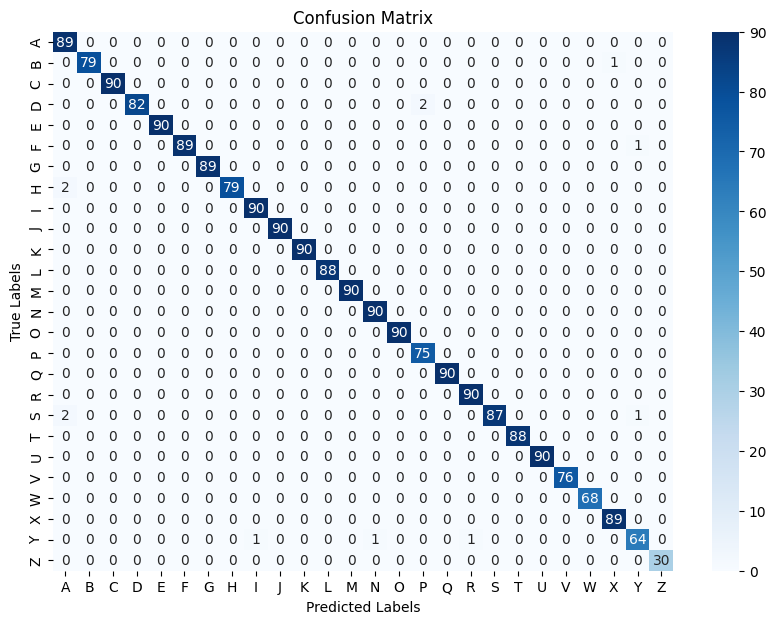

In [16]:
y_test_pred = clf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

print("\nTest Set Metrics:")
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test F1 Score (Weighted): {test_f1:.4f}')
print("Test Confusion Matrix:")

print("\nTest Classification Report:")
print(test_classification_rep)

print("Test Confusion Matrrix")


plt.figure(figsize=(10,7))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [17]:
# Save model
import joblib

joblib.dump(clf, 'bisindo_classifier.pkl')

['bisindo_classifier.pkl']